# Keras深度学习模型建立
以下数据来自MNIST dataset.  
12次迭代后测试acc可达到99.25%,模型需要大量参数调整。

## 1、引入各类库

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


## 2、对模型输入进行设置，并加载数据

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 3、预览数据

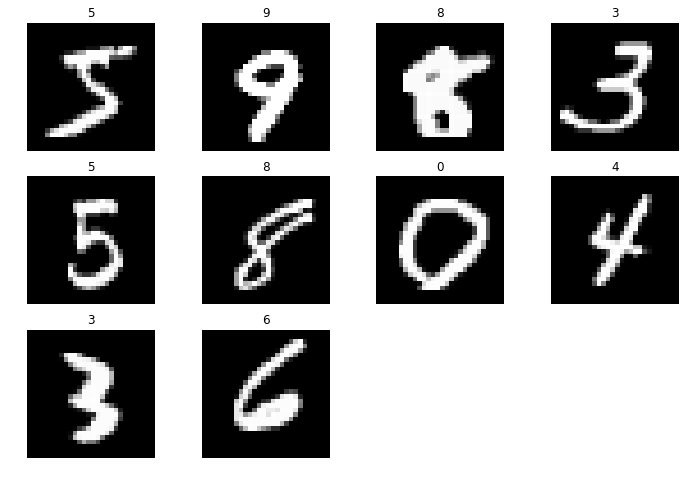

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
for i in range(0, num_classes):
    plt.subplot(3, 4, i+1)
    x_selected = x_train[i*5999]
    plt.imshow(x_selected.squeeze(), cmap="gray")
    plt.title(list(y_train[i*5999]).index(1))
    plt.axis('off')
plt.show()

## 4、建立模型

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## 5、打印出当前模型

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 54s 893us/step - loss: 0.3325 - acc: 0.8982 - val_loss: 0.0769 - val_acc: 0.9755
Epoch 2/12
60000/60000 [==============================] - 51s 847us/step - loss: 0.1146 - acc: 0.9663 - val_loss: 0.0545 - val_acc: 0.9819
Epoch 3/12
60000/60000 [==============================] - 50s 830us/step - loss: 0.0848 - acc: 0.9743 - val_loss: 0.0405 - val_acc: 0.9860
Epoch 4/12
60000/60000 [==============================] - 49s 825us/step - loss: 0.0716 - acc: 0.9791 - val_loss: 0.0391 - val_acc: 0.9864
Epoch 5/12
60000/60000 [==============================] - 49s 820us/step - loss: 0.0618 - acc: 0.9812 - val_loss: 0.0339 - val_acc: 0.9880
Epoch 6/12
60000/60000 [==============================] - 51s 847us/step - loss: 0.0569 - acc: 0.9835 - val_loss: 0.0308 - val_acc: 0.9893
Epoch 7/12
60000/60000 [==============================] - 49s 824us/step - loss: 0.0510 - acc: 0.9850 - val_loss: 0.

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026880006876480185
Test accuracy: 0.9912


real:5&5,predict:[[1.7816930e-09 1.6010233e-07 9.9074517e-09 1.6099047e-02 3.5269199e-10
  9.8389637e-01 2.6876404e-07 2.6415989e-08 7.7362159e-07 3.4511318e-06]]
real:1&1,predict:[[4.0463460e-10 9.9999976e-01 9.9581206e-09 2.3093971e-11 2.9726922e-07
  9.0706130e-11 1.0735798e-08 1.3711901e-08 1.0890312e-08 6.7370658e-12]]
real:0&0,predict:[[9.9999917e-01 3.1188022e-10 6.3567832e-08 2.5801281e-11 3.5862261e-08
  4.5433340e-12 5.1272406e-07 2.5170505e-10 9.2487824e-08 9.9220024e-08]]
real:1&1,predict:[[1.0283150e-07 9.9993098e-01 2.4444606e-07 1.5505613e-08 1.6035399e-05
  8.4503675e-08 2.9372339e-08 4.9854632e-05 2.2499451e-06 3.0369770e-07]]
real:5&5,predict:[[2.5878418e-12 2.9573323e-11 7.7973489e-14 1.2418094e-08 4.5911382e-11
  9.9999988e-01 5.3073196e-10 4.3152171e-13 1.2302441e-07 5.3111200e-09]]
real:8&8,predict:[[5.1449361e-12 7.6929207e-10 4.5822486e-07 5.5136264e-09 3.8665851e-13
  1.1804971e-10 1.1062639e-10 7.2161005e-10 9.9999952e-01 1.3538565e-11]]
real:4&4,predict:[[1.3

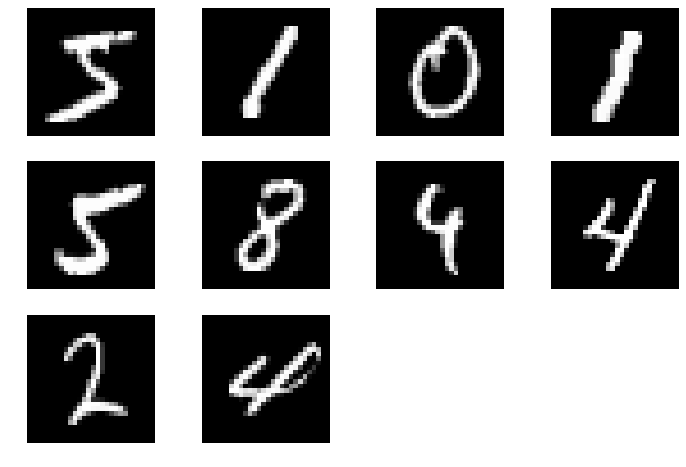

In [33]:
plt.figure(figsize=(12, 8))
for i in range(0, num_classes):
    plt.subplot(3, 4, i+1)
    x_selected = x_train[i*59:i*59+1]
    plt.imshow(x_selected.squeeze(), cmap="gray")
    titles = "real:" + str(list(y_train[i*59]).index(1))+",predict:"+str(model.predict(x_selected))
    print(titles)
    plt.axis('off')
plt.show()